In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
file_path = 'migraine.csv'
migraine_data = pd.read_csv(file_path)
migraine_data.head()

,rs_number,chromosome,position,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p.value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,Neff,migraine_association
0,rs1869970,1,2829551,G,A,0.222105,-0.037031,0.006250,-0.049282,-0.024780,-5.924669,3.220000e-09,8.492553,5.932519,0.204245,0.325750,5,872398,148170,0
1,rs10797359,1,2829862,A,G,0.216437,-0.037383,0.006403,-0.049933,-0.024834,-5.838550,5.410000e-09,8.266913,6.402436,0.171042,0.375238,5,872398,143823,0
2,rs10797360,1,2829922,C,T,0.222019,-0.036601,0.006327,-0.049002,-0.024200,-5.784931,7.450000e-09,8.128012,6.448137,0.168088,0.379666,5,872398,144626,0
3,rs2606408,1,2831369,C,T,0.221087,-0.036338,0.006308,-0.048701,-0.023975,-5.760921,8.590000e-09,8.066207,6.013693,0.198128,0.334851,5,872398,145937,0
4,rs1563475,1,2831588,T,G,0.220732,-0.036874,0.006353,-0.049326,-0.024422,-5.804107,6.640000e-09,8.177547,6.526785,0.163111,0.387141,5,872398,144042,0


In [3]:
# Dropping rows with null values in specific columns ('eaf', 'n_samples', 'i2', 'beta')
migraine_data = migraine_data.dropna(subset=['eaf', 'n_samples', 'i2', 'beta'])
migraine_data.head()

,rs_number,chromosome,position,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p.value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,Neff,migraine_association
0,rs1869970,1,2829551,G,A,0.222105,-0.037031,0.006250,-0.049282,-0.024780,-5.924669,3.220000e-09,8.492553,5.932519,0.204245,0.325750,5,872398,148170,0
1,rs10797359,1,2829862,A,G,0.216437,-0.037383,0.006403,-0.049933,-0.024834,-5.838550,5.410000e-09,8.266913,6.402436,0.171042,0.375238,5,872398,143823,0
2,rs10797360,1,2829922,C,T,0.222019,-0.036601,0.006327,-0.049002,-0.024200,-5.784931,7.450000e-09,8.128012,6.448137,0.168088,0.379666,5,872398,144626,0
3,rs2606408,1,2831369,C,T,0.221087,-0.036338,0.006308,-0.048701,-0.023975,-5.760921,8.590000e-09,8.066207,6.013693,0.198128,0.334851,5,872398,145937,0
4,rs1563475,1,2831588,T,G,0.220732,-0.036874,0.006353,-0.049326,-0.024422,-5.804107,6.640000e-09,8.177547,6.526785,0.163111,0.387141,5,872398,144042,0


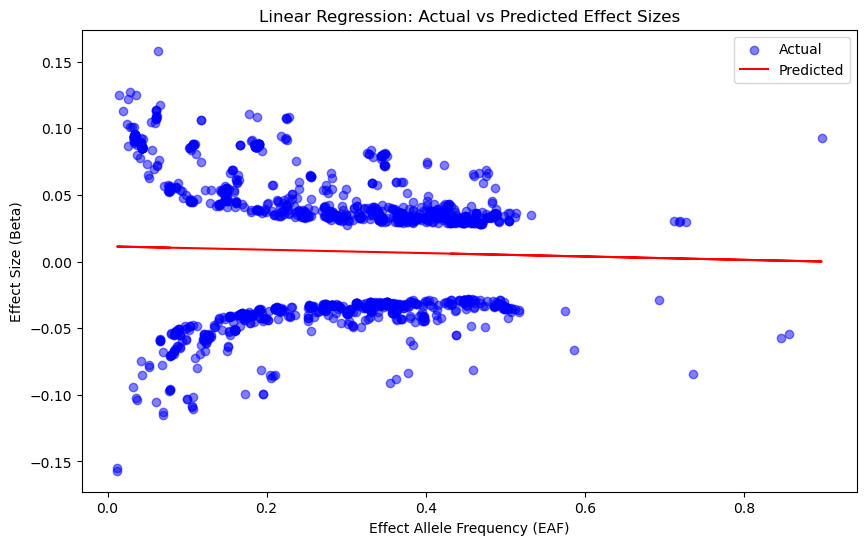

(0.0025889111815844772, 0.0009953074878085166)

In [4]:
#eaf and beta

X = migraine_data[['eaf']]
y = migraine_data['beta']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Actual vs Predicted Effect Sizes')
plt.xlabel('Effect Allele Frequency (EAF)')
plt.ylabel('Effect Size (Beta)')
plt.legend()
plt.show()

mse_linear, r2_linear


In [5]:
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results_sm = model_sm.fit()
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   beta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.427
Date:                Wed, 13 Dec 2023   Prob (F-statistic):            0.00371
Time:                        10:01:41   Log-Likelihood:                 10043.
No. Observations:                6448   AIC:                        -2.008e+04
Df Residuals:                    6446   BIC:                        -2.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.001      8.233      0.0

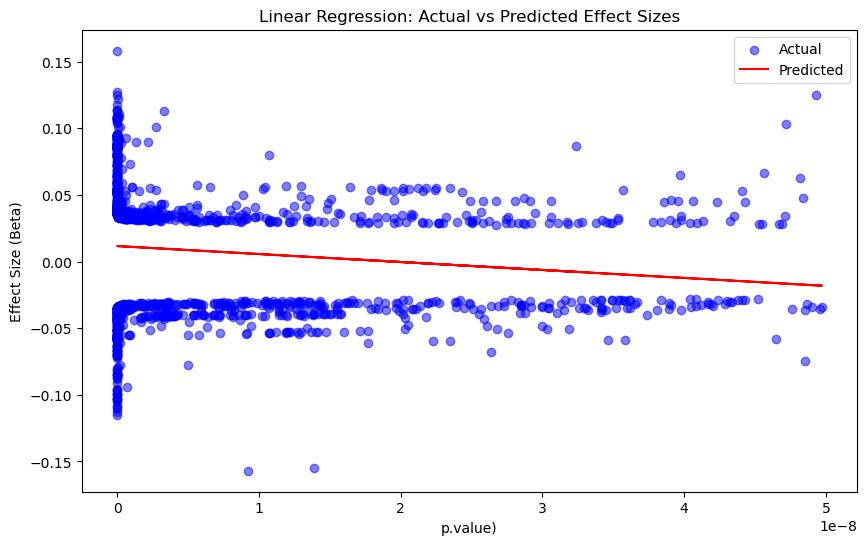

(0.002533578670282887, 0.02234692388622872)

In [6]:
#pvalue and beta

X = migraine_data[['p.value']] 
y = migraine_data['beta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Actual vs Predicted Effect Sizes')
plt.xlabel('p.value)')
plt.ylabel('Effect Size (Beta)')
plt.legend()
plt.show()

mse_linear, r2_linear

In [7]:
X_train_sm = sm.add_constant(X_train) 
model_sm = sm.OLS(y_train, X_train_sm)
results_sm = model_sm.fit()
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   beta   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     114.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.61e-26
Time:                        10:01:41   Log-Likelihood:                 10096.
No. Observations:                6448   AIC:                        -2.019e+04
Df Residuals:                    6446   BIC:                        -2.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0116      0.001     16.104      0.0

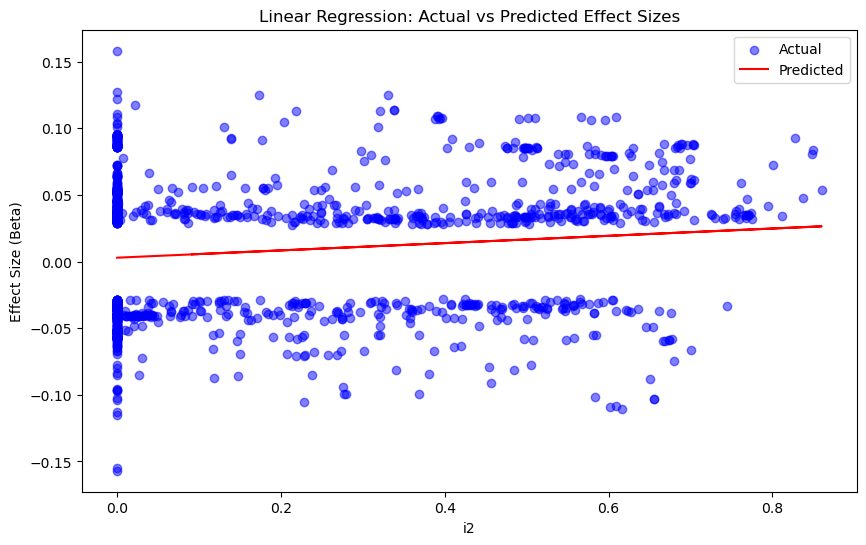

(0.0025132373579692213, 0.030196195270182136)

In [8]:
#i2 and beta

X = migraine_data[['i2']] 
y = migraine_data['beta'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Actual vs Predicted Effect Sizes')
plt.xlabel('i2')
plt.ylabel('Effect Size (Beta)')
plt.legend()
plt.show()

mse_linear, r2_linear

In [9]:
X_train_sm = sm.add_constant(X_train) 
model_sm = sm.OLS(y_train, X_train_sm)
results_sm = model_sm.fit()
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   beta   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     110.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.18e-25
Time:                        10:01:42   Log-Likelihood:                 10094.
No. Observations:                6448   AIC:                        -2.018e+04
Df Residuals:                    6446   BIC:                        -2.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.001      3.716      0.0

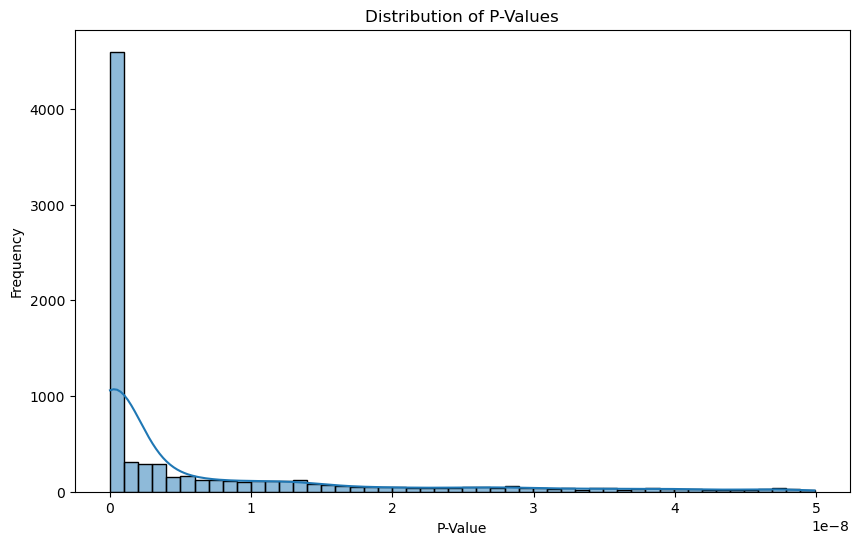

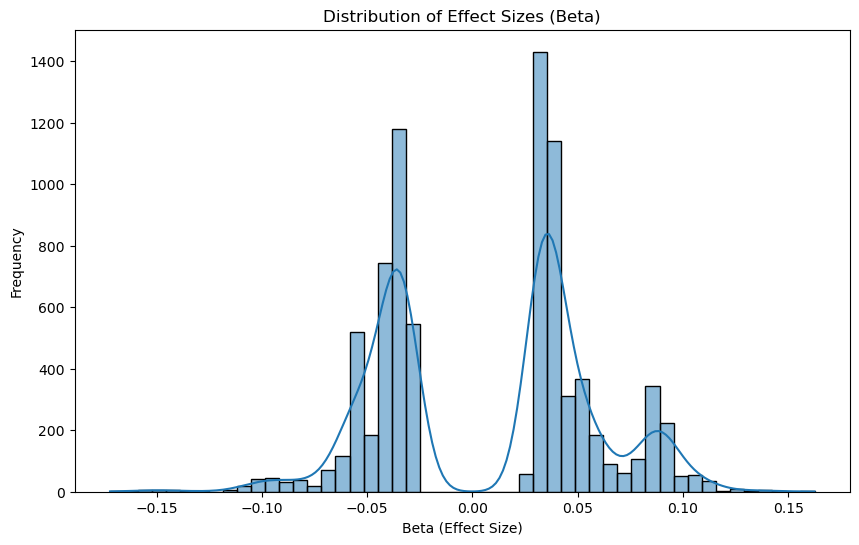

In [10]:

plt.figure(figsize=(10, 6))
sns.histplot(migraine_data['p.value'], bins=50, kde=True)
plt.title('Distribution of P-Values')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(migraine_data['beta'], bins=50, kde=True)
plt.title('Distribution of Effect Sizes (Beta)')
plt.xlabel('Beta (Effect Size)')
plt.ylabel('Frequency')
plt.show()


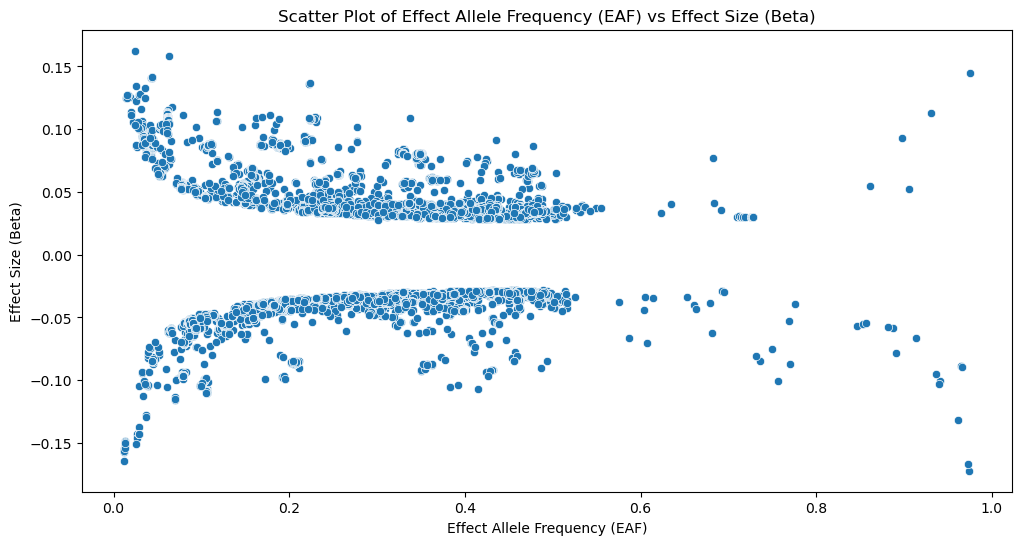

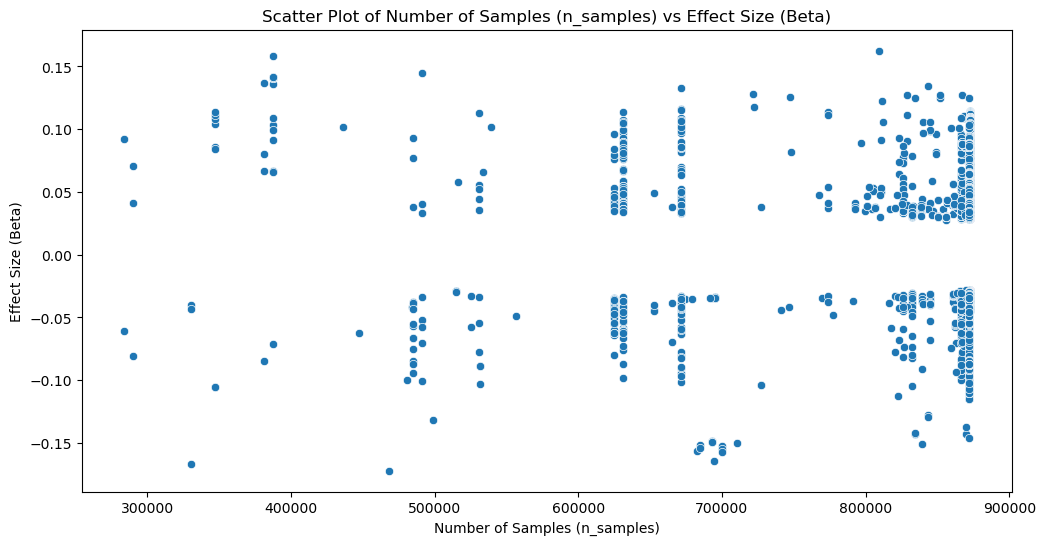

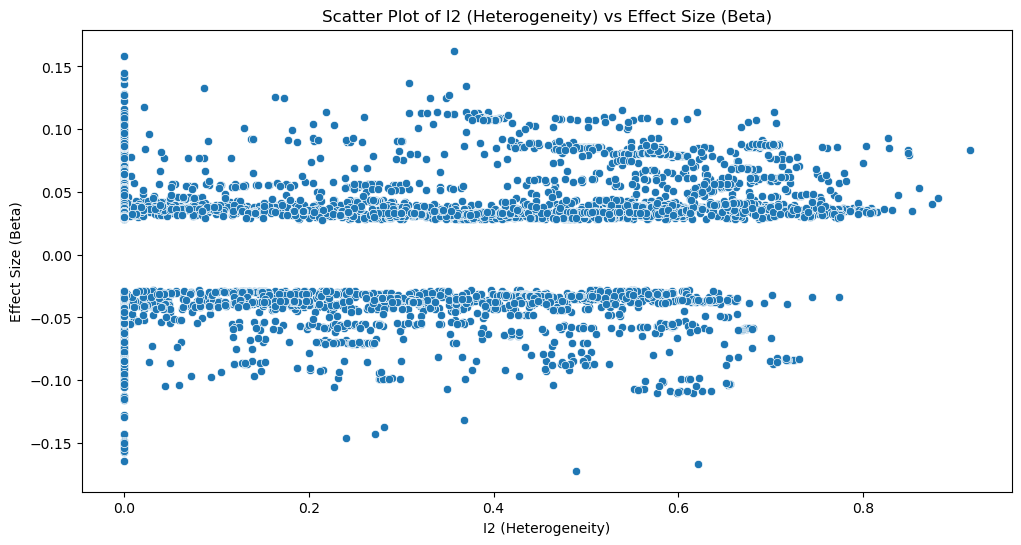

In [11]:
# Visualization of 'eaf' vs 'beta'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='eaf', y='beta', data=migraine_data)
plt.title('Scatter Plot of Effect Allele Frequency (EAF) vs Effect Size (Beta)')
plt.xlabel('Effect Allele Frequency (EAF)')
plt.ylabel('Effect Size (Beta)')
plt.show()

# Visualization of 'n_samples' vs 'beta'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='n_samples', y='beta', data=migraine_data)
plt.title('Scatter Plot of Number of Samples (n_samples) vs Effect Size (Beta)')
plt.xlabel('Number of Samples (n_samples)')
plt.ylabel('Effect Size (Beta)')
plt.show()

# Visualization of 'i2' vs 'beta'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='i2', y='beta', data=migraine_data)
plt.title('Scatter Plot of I2 (Heterogeneity) vs Effect Size (Beta)')
plt.xlabel('I2 (Heterogeneity)')
plt.ylabel('Effect Size (Beta)')
plt.show()


The linear model is: Beta = -0.0124 + (-0.0056 * EAF) + (33719.0166 * i2) + (1.9942 * p.value)


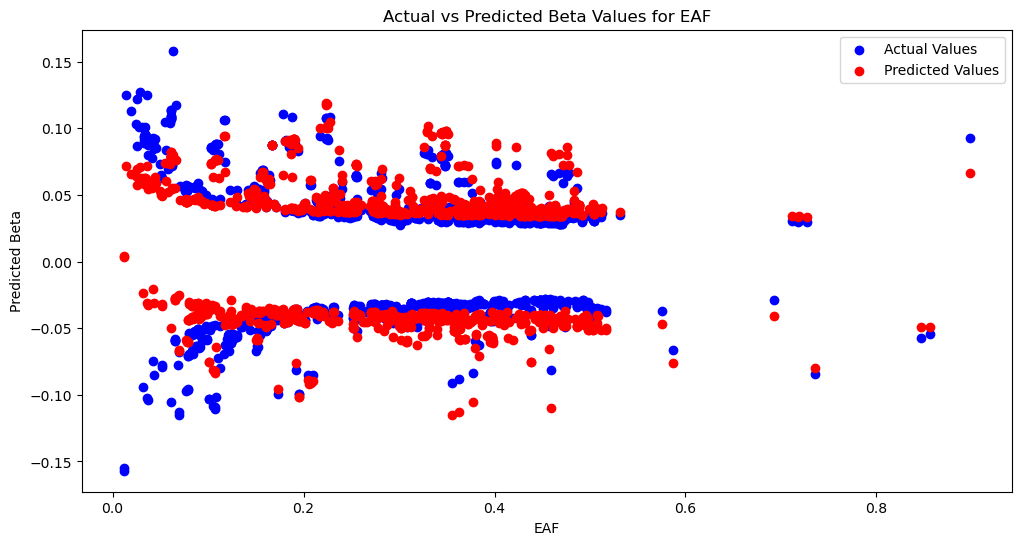

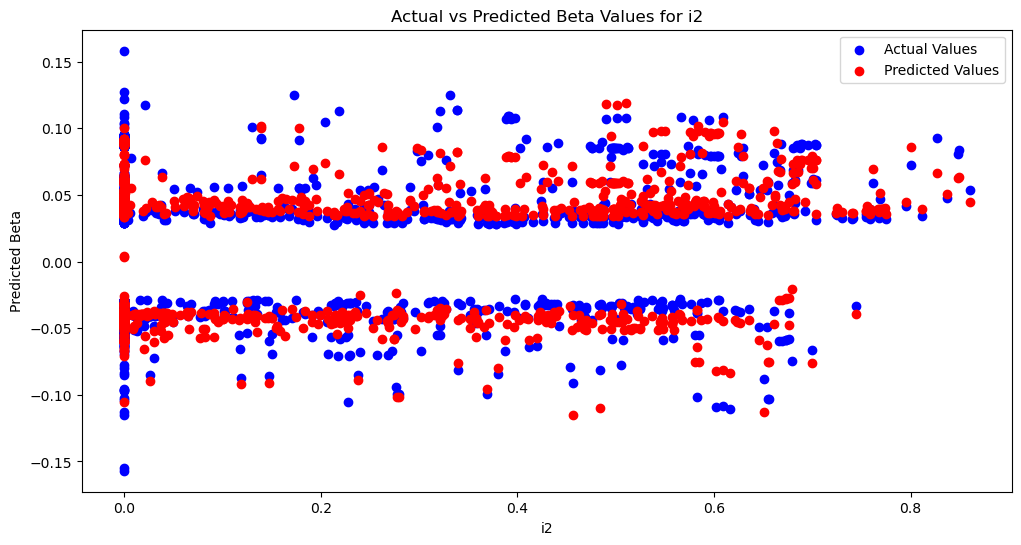

In [12]:
X = migraine_data[['eaf', 'p.value','se','z','n_samples','i2']]
y = migraine_data['beta']        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
intercept = linear_model.intercept_
coefficients = linear_model.coef_

print(f"The linear model is: Beta = {intercept:.4f} + ({coefficients[0]:.4f} * EAF) + ({coefficients[1]:.4f} * i2) + ({coefficients[2]:.4f} * p.value)")
y_pred = linear_model.predict(X_test)


plt.figure(figsize=(12, 6))
plt.scatter(X_test['eaf'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['eaf'], y_pred, color='red', label='Predicted Values')
plt.xlabel('EAF')
plt.ylabel('Predicted Beta')
plt.title('Actual vs Predicted Beta Values for EAF')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(X_test['i2'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['i2'], y_pred, color='red', label='Predicted Values')
plt.xlabel('i2')
plt.ylabel('Predicted Beta')
plt.title('Actual vs Predicted Beta Values for i2')
plt.legend()
plt.show()

In [13]:
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results_sm = model_sm.fit()
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   beta   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 1.039e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:01:44   Log-Likelihood:                 17673.
No. Observations:                6448   AIC:                        -3.533e+04
Df Residuals:                    6441   BIC:                        -3.528e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0124      0.004     -3.162      0.0

In [14]:
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print(f"R-squared on Test Set: {r2}")

Mean Squared Error on Test Set: 0.00020669226304829074
Mean Squared Error: 0.00020669226304829074
Root Mean Squared Error: 0.014376795993832936
R-squared on Test Set: 0.9202419371664841


In [19]:
# Randomly select 3 'rs_numbers' from the original dataset for prediction
random_indices = np.random.choice(migraine_data.index, size=3, replace=False)
random_X = X.loc[random_indices]

predicted_beta = linear_model.predict(random_X)
predictions_model = pd.DataFrame({
    'Case Index': random_indices,
    'Actual Beta': y.loc[random_indices],
    'Predicted Beta': predicted_beta,
}).reset_index(drop=True)

predictions_model


,Case Index,Actual Beta,Predicted Beta
0,6661,0.036164,0.038325
1,7827,-0.046176,-0.034987
2,2582,-0.040835,-0.039421
